# This notebook shows the experiments related to ATAC-seq on synthetic enhancer integrated cell lines.

#### Processed ATAC-seq data is in data/lenti_atac_chip folder.
#### It consist of:
* Reading ATAC-seq files and calculating the coverage on the enhancers
#### Figures are saved to ./figures/lenti_atac_chip folder

### General imports


In [1]:
import pyBigWig
import pyranges as pr
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
matplotlib.style.use("default")
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Loading the gtf file of the integrated cassette that harbors the synthetic enhancer

In [2]:
pr_gtf = pr.read_gtf("data/lenti_atac_chip/MMEFS.gtf")

### Loading the ATAC-seq bigwig files and calculating the coverage on integrated synthetic sequences

In [3]:
evolved_all_MM001_bw = pyBigWig.open("data/lenti_atac_chip/OmniATAC_MM001_EFS_enhancers_lenti.bwa.out.fixmate.possorted.dedup.noblacklist.RPGCnormalized.bw")
evolved_all_MM099_bw = pyBigWig.open("data/lenti_atac_chip/OmniATAC_MM099_EFS_enhancers_lenti.bwa.out.fixmate.possorted.dedup.noblacklist.RPGCnormalized.bw")

MMEFS_MM001_values = {}
MMEFS_MM099_values = {}
for i in range(1,11):
    MMEFS_MM001_values[i] = evolved_all_MM001_bw.values("MM-EFS-"+str(i), 1, 4397)
    MMEFS_MM099_values[i] = evolved_all_MM099_bw.values("MM-EFS-"+str(i), 1, 4397)

### Plotting the ATAC-seq coverage on integrated synthetic sequences

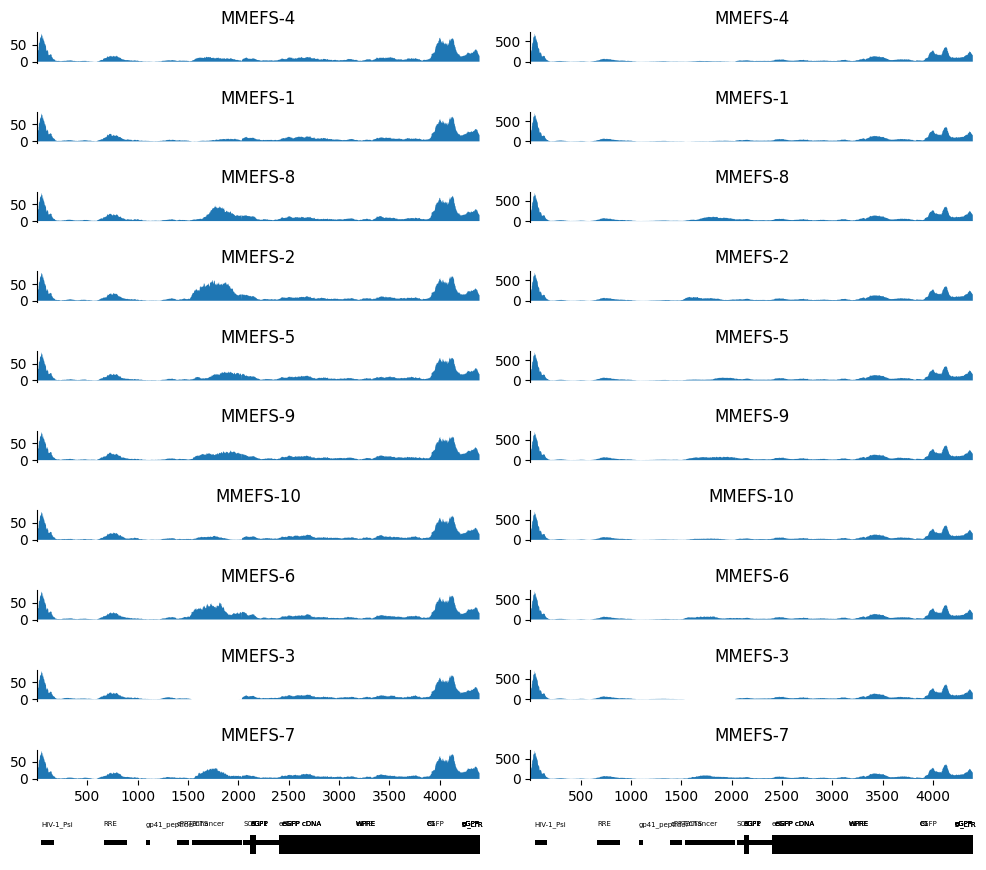

In [4]:
n_tracks = 11
fig = plt.figure(figsize=(10,0.8*n_tracks))
start = 1
end = 4397
for i, EFS in enumerate([4,1,8,2,5,9,10,6,3,7]):
    ax  = fig.add_subplot(n_tracks,2,i*2+1)
    ax.fill_between(np.linspace(start, end, num=len(MMEFS_MM001_values[EFS])),0,MMEFS_MM001_values[EFS]) 
    ax.set_title("MMEFS-"+str(EFS))
    ax.margins(x=0)
    if i!=9:
        ax.set_xticks([])
    
for i, EFS in enumerate([4,1,8,2,5,9,10,6,3,7]):
    ax  = fig.add_subplot(n_tracks,2,i*2+2)
    ax.fill_between(np.linspace(start, end, num=len(MMEFS_MM099_values[EFS])),0,MMEFS_MM099_values[EFS]) 
    ax.set_title("MMEFS-"+str(EFS))
    ax.margins(x=0)
    if i!=9:
        ax.set_xticks([])

sns.despine(top=True, right=True, bottom=True)

for ax_no in [21,22]:
    ax  = fig.add_subplot(n_tracks,2,ax_no)
    gtf_region_intersect = pr_gtf.intersect(pr_gtf)
    genes_in_window = set(gtf_region_intersect.gene_name)
    n_genes_in_window = len(genes_in_window)
    for idx, _gene in enumerate(genes_in_window):
        for _, part in gtf_region_intersect.df.loc[gtf_region_intersect.df['gene_name'] == _gene].iterrows():
            if part['Feature'] == 'exon':
                exon_start = part['Start']
                exon_end = part['End']
                rect = mpatches.Rectangle(
                    (exon_start, -1), exon_end-exon_start, 2, fill=True, color="k", linewidth=0)
                ax.add_patch(rect)
            elif part['Feature'] == 'transcript':
                gene_start = part['Start']
                gene_end = part['End']
                rect = mpatches.Rectangle(
                    (gene_start, 0), gene_end-gene_start, 0.5, fill=True, color="k", linewidth=0)
                ax.add_patch(rect)
            ax.text(gene_start, 2, part["gene_id"], fontsize=5)

    ax.set_ylim([-2/1.2, 2/1.2])
    ax.set_xlim([1, 4397])
    sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_alpha(0)

fig.tight_layout()
plt.savefig("figures/lenti_atac_chip/MMEFS_all_MM001_MM099_ATAC.pdf",transparent=True)

### Loading the ATAC-seq bigwig files and calculating the coverage on integrated synthetic sequences that are at random state, evolved state, or repressed state

In [5]:
repressed_bw = pyBigWig.open("data/lenti_atac_chip/OmniATAC_MM001_pool_1_enhancers_repressed_seq.bwa.out.fixmate.possorted.dedup.noblacklist.RPGCnormalized.bw")
random_bw = pyBigWig.open("data/lenti_atac_chip/OmniATAC_MM001_pool_2_enhancers_random_seq.bwa.out.fixmate.possorted.dedup.noblacklist.RPGCnormalized.bw")
evolved_bw = pyBigWig.open("data/lenti_atac_chip/OmniATAC_MM001_pool_3_enhancers_evolved_seq.bwa.out.fixmate.possorted.dedup.noblacklist.RPGCnormalized.bw")

repressed_values = {}
for i in [4,1,8]:
    repressed_values[i] = repressed_bw.values("MM-EFS-"+str(i)+"_repr", 1, 4397)
random_values = {}
for i in [4,1,8]:
    random_values[i] = random_bw.values("MM-EFS-"+str(i)+"_rand", 1, 4397)
evolved_values = {}
for i in [4,1,8]:
    evolved_values[i] = evolved_bw.values("MM-EFS-"+str(i), 1, 4397)

### Plotting the ATAC-seq coverage on integrated synthetic sequences that are at random state, evolved state, or repressed statev

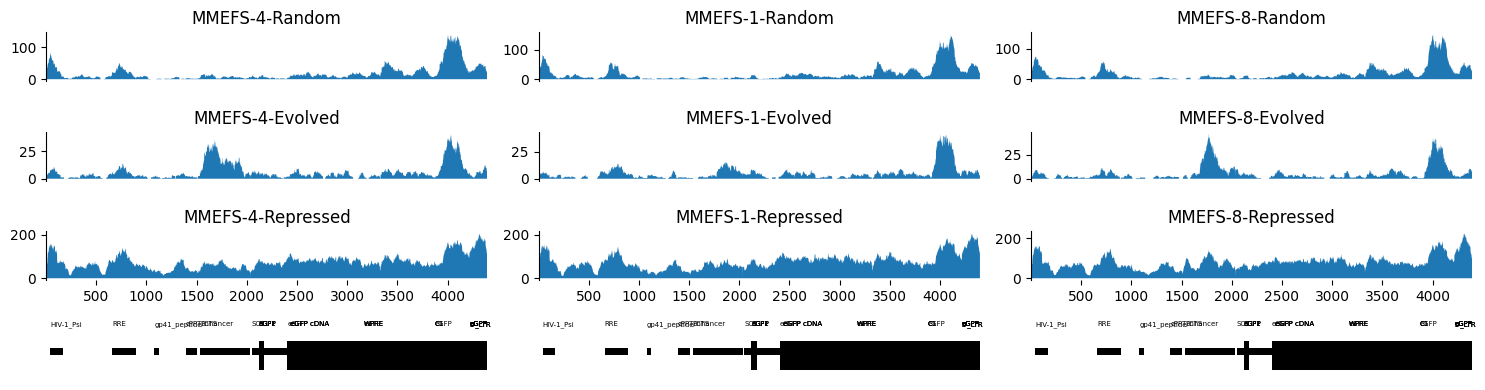

In [8]:
n_tracks = 4
fig = plt.figure(figsize=(15,1*n_tracks))
start = 1
end = 4397

for i, EFS in enumerate([4,1,8]):
    ax  = fig.add_subplot(n_tracks,3,i+1)
    ax.fill_between(np.linspace(start, end, num=len(random_values[EFS])),0,random_values[EFS]) 
    ax.set_title("MMEFS-"+str(EFS)+"-Random")
    ax.margins(x=0)
    ax.set_xticks([])
        
for i, EFS in enumerate([4,1,8]):
    ax  = fig.add_subplot(n_tracks,3,3+i+1)
    ax.fill_between(np.linspace(start, end, num=len(evolved_values[EFS])),0,evolved_values[EFS]) 
    ax.set_title("MMEFS-"+str(EFS)+"-Evolved")
    ax.margins(x=0)
    ax.set_xticks([])
         
for i, EFS in enumerate([4,1,8]):
    ax  = fig.add_subplot(n_tracks,3,6+i+1)
    ax.fill_between(np.linspace(start, end, num=len(repressed_values[EFS])),0,repressed_values[EFS]) 
    ax.set_title("MMEFS-"+str(EFS)+"-Repressed")
    ax.margins(x=0)
    
sns.despine(top=True, right=True, bottom=True)

for ax_no in [10,11,12]:
    ax  = fig.add_subplot(n_tracks,3,ax_no)
    gtf_region_intersect = pr_gtf.intersect(pr_gtf)
    genes_in_window = set(gtf_region_intersect.gene_name)
    n_genes_in_window = len(genes_in_window)
    for idx, _gene in enumerate(genes_in_window):
        for _, part in gtf_region_intersect.df.loc[gtf_region_intersect.df['gene_name'] == _gene].iterrows():
            if part['Feature'] == 'exon':
                exon_start = part['Start']
                exon_end = part['End']
                rect = mpatches.Rectangle(
                    (exon_start, -1), exon_end-exon_start, 2, fill=True, color="k", linewidth=0)
                ax.add_patch(rect)
            elif part['Feature'] == 'transcript':
                gene_start = part['Start']
                gene_end = part['End']
                rect = mpatches.Rectangle(
                    (gene_start, 0), gene_end-gene_start, 0.5, fill=True, color="k", linewidth=0)
                ax.add_patch(rect)
            ax.text(gene_start, 2, part["gene_id"], fontsize=5)

    ax.set_ylim([-2/1.2, 2/1.2])
    ax.set_xlim([start, end])
    sns.despine(top=True, right=True, left=True, bottom=True, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.patch.set_alpha(0)
    
fig.tight_layout()
plt.savefig("figures/lenti_atac_chip/MMEFS_Rand_Evolved_Repr_EFS4-1-8_MM001_ATAC.pdf",transparent=True)